## 1. Subset

In [21]:
def subset(nums):
    rst = [[]]
    for num in nums:
        extra = []
        for lst in rst:
            extra.append(lst + [num])
        rst += extra
    return rst

nums = [1,2,3]
subset(nums)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

In [329]:
# bfs法
# 针对每个元素，复制一份rst后，对备份一顿操作，然后替换回（更新回）rst中
def subset(nums):
    rst = [[]]
    
    for i in range(len(nums)):
        new_rst = rst[:]
        for sub in rst:
            new_sub = sub[:]
            new_sub.append(nums[i])
            new_rst.append(new_sub)
        rst = new_rst
    
    return rst

nums = [1,2,3]
subset(nums)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

In [2]:
# backtrack dfs法
# dfs法和bfs法不同之处在于
# bfs针对每个元素，每次都要把整个rst遍历一遍，每次的结果都是继承自上次的迭代
# dfs是达到条件才往rst里添加，且不会遍历rst
# dfs对每个元素都有一套树操作，最后生成的每个结果只继承自上层递归，与平行的迭代无关
def subset(nums):
    rst = []
    lst = []
    dfs(rst, lst, nums)
    return rst

def dfs(rst, lst, nums):
    rst.append(lst[:])
    for i in range(len(nums)):
        lst.append(nums[i])
        dfs(rst, lst, nums[i+1:])
        lst.pop()

nums = [1,2,3]
subset(nums)

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]

## 2. Permutation

Given abc:

Output: bca cba cab acb bac abc

In [25]:
def perm(nums):
    rst = ['']
    for num in nums:
        tmp = []
        for lst in rst:
            for i in range(len(lst)+1):
                tmp.append(lst[:i] + num + lst[i:])
        rst = tmp
        
    return rst

nums = '123'
perm(nums)

['321', '231', '213', '312', '132', '123']

In [26]:
def perm(nums):
    rst = []
    s = ''
    dfs(rst, s, nums)
    return rst

def dfs(rst, s, nums):
    if len(nums) == 0:
        rst.append(s)
    for i in range(len(nums)):
        dfs(rst, s+nums[i], nums[:i]+nums[i+1:])
        
nums = '123'
perm(nums)

['123', '132', '213', '231', '312', '321']

In [8]:
def perm(nums):
    rst = ''
    dfs(nums, rst)
    
def dfs(nums, rst):
    if len(nums) == 0:
        print(rst)
    for i in range(len(nums)):
        new_rst = rst + nums[i]
        dfs(nums[:i]+nums[i+1:], new_rst)

nums = '123'
perm(nums)

123
132
213
231
312
321


In [9]:
def perm(nums):
    cur = ['']
    
    for i in range(len(nums)):
        nxt = []
        for sub in cur:
            for j in range(len(sub)+1):
                nxt.append(sub[:j]+nums[i]+sub[j:])
        cur = nxt[:]
    
    return cur

nums = '123'
perm(nums)

['321', '231', '213', '312', '132', '123']

## 3. 给一串字符“121”，然后找可能性（{1，2，1}, {12,1}, {1, 21}} 这种

In [8]:
def split(string):
    rst = []
    lst = [string]
    dfs(rst, lst)
    return rst

def dfs(rst, lst):
    rst.append(lst)
    n = len(lst[-1])
    for i in range(1, n):
        new_lst = lst[:-1] + [lst[-1][:i], lst[-1][i:]]
        dfs(rst, new_lst)

string = 'abcd'
split(string)

[['abcd'],
 ['a', 'bcd'],
 ['a', 'b', 'cd'],
 ['a', 'b', 'c', 'd'],
 ['a', 'bc', 'd'],
 ['ab', 'cd'],
 ['ab', 'c', 'd'],
 ['abc', 'd']]

In [9]:
def split(string):
    rst = []
    lst = [string]
    dfs(rst, lst)
    return rst

def dfs(rst, lst):
    # 比如['abcd']
    # 切一刀，有['a', 'bcd']，['ab', 'cd'], ['abc', 'd']
    # 切两刀，有['a', 'b', 'cd'], ['a', 'bc', 'd']
    # 切三刀，有['a', 'b', 'c', 'd']
    # 这里切的位置由迭代决定，切的刀数由递归决定
    rst.append(lst)
    n = len(lst[-1])
    for i in range(1, n):
        new_lst = lst[:-1] + [lst[-1][:i]] + [lst[-1][i:]]
        dfs(rst, new_lst)
    
    return rst

string = 'abcd'
split(string)
    

[['abcd'],
 ['a', 'bcd'],
 ['a', 'b', 'cd'],
 ['a', 'b', 'c', 'd'],
 ['a', 'bc', 'd'],
 ['ab', 'cd'],
 ['ab', 'c', 'd'],
 ['abc', 'd']]

In [327]:
lst = ['abc', 'def']
lst[:-1]

['abc']

In [10]:
a = [1,2,3,4]
a[:-1]

[1, 2, 3]

## 4. 树的序列化和反序列化

In [6]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        if root == None:
            return [None]
        rst = []
        cur_level = [root]
        while len(cur_level) > 0:
            next_level = []
            is_last_level = True # 要统计是否最后行，如果是最后一行就扫完这行就结束，不然会多一层的None
            for node in cur_level:
                if node is None:
                    rst.append(None)
                else:
                    rst.append(node.val)
                    if node.left != None:
                        is_last_level = False
                        next_level.append(node.left)
                    else:
                        next_level.append(None)
                    if node.right != None:
                        is_last_level = False
                        next_level.append(node.right)
                    else:
                        next_level.append(None)
            if is_last_level == True:
                cur_level = []
            else:
                cur_level = next_level
            
        return rst
                
        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        if data[0] == None:
            return None

        root = TreeNode(data[0])
        cur_level = [root]
        i = 1
        while len(cur_level) > 0:
            next_level = []
            for node in cur_level:
                if i == len(data):
                    return root
                if data[i] != None:
                    node.left = TreeNode(data[i])
                    next_level.append(node.left)
                else:
                    node.left = None
                i += 1

                if i == len(data):
                    return root
                if data[i] != None:
                    node.right = TreeNode(data[i])
                    next_level.append(node.right)
                else:
                    node.right = None
                i += 1

            cur_level = next_level
            
codec = Codec()
data = [1,2,3, None, None, 4, 5]
root = codec.deserialize(data)
rst = codec.serialize(root)
print(rst)

[1, 2, 3, None, None, 4, 5]


## 5. 判断是不是旋转数组

In [ ]:
#
# 旋转字符串
# @param A string字符串 
# @param B string字符串 
# @return bool布尔型
#
class Solution:
    def solve(self , A , B ):
        # write code here
        if len(A) != len(B):
            return False
        doubleA = A + A
        
        for i in range(len(A)):
            flag = True
            for j in range(len(B)):
                if doubleA[i+j] != B[j]:
                    flag = False
                    break
            if flag == True:
                return True
        return False

## 6. 开根号

In [8]:
def sqrt(x):
#     if x == 0:
#         return 0
    left, right = 0, x
    while left+1 < right:
        mid = left + (right-left) // 2
        if mid**2 == x:
            return mid
        elif mid**2 < x:
            left = mid
        else:
            right = mid
    
    if right**2 <= x: #一定要加上=号
        return right
    elif left**2 <= x:
        return left
    else:
        return -1
    
sqrt(0)

0

## 7. 验证数独

In [17]:
def solveSudoku(board):
        # write code here
    if len(board) != 9 or len(board[0]) != 9:
        return False
    for i in range(len(board)):
        row_rst = col_rst = cell_rst = 0
        for j in range(len(board[0])):
            tmp = board[i][j]
            if tmp < 1 or tmp > 9:
                return False
            if row_rst & (1 << tmp) == 0:
                row_rst = row_rst | (1 << tmp)
            else:
                return False
            tmp = board[j][i]
            if col_rst & (1 << tmp) == 0:
                col_rst = col_rst | (1 << tmp)
            else:
                return False
            tmp = board[j//3+(i//3)*3][j%3+(i//3)*3]
            if cell_rst & (1 << tmp) == 0:
                cell_rst = cell_rst | (1 << tmp)
            else:
                return False
    return True


matrix = [
    [5,3,4,6,7,8,9,1,2],
    [6,7,2,1,9,5,3,4,8],
    [1,9,8,3,4,2,5,6,7],
    [8,5,9,7,6,1,4,2,3],
    [4,2,6,8,5,3,7,9,1],
    [7,1,3,9,2,4,8,5,6],
    [9,6,1,5,3,7,2,8,4],
    [2,8,7,4,1,9,6,3,5],
    [3,4,5,2,8,6,1,7,9]
]

solveSudoku(matrix)

True

## 8. 有序数组找到num[i]=i的那个。进阶：数组可能有重复值。用二分法做了一下。

In [20]:
def search(nums):
    if len(nums) == 0:
        return -1
    l, r = 0, len(nums)-1
    while l+1 < r:
        mid = l + (r-l)//2
        if nums[mid] == mid:
            return mid
        elif mid > nums[mid]:
            l = mid
        else:
            r = mid
    if nums[l] == l:
        return l
    if nums[r] == r:
        return r
    return -1

nums = [-3,-2,-1,0,1,5,7,8]
search(nums)

5

In [44]:
def solve(a):
        # write code here
    if len(a) < 2:
        return -1
    l, r = 0, len(a)-1
    pre_rst = rst = 0
    while l+1 < r:
        mid = l + (r-l)//2
#         print('--', mid, '--')
        if a[mid-1] < a[mid] and a[mid] > a[mid+1]:
            l = mid
            pre_rst = rst
            rst = mid
        elif a[mid-1] < a[mid] < a[mid+1]:
            l = mid
        elif a[mid-1] > a[mid] and a[mid] < a[mid+1]:
            l = mid
        else:
#             print('/*-')
            if is_end(a, mid, r):
                r = mid
            else:
                l = mid
        
    if l > 0 and a[l-1] < a[l] and a[l] > a[l+1]:
        return l
    elif r < len(a)-1 and a[r-1] < a[r] and a[r] > a[r+1]:
        return r
    else:
        return pre_rst
        
def is_end(a, l, r):
    print('++', l + (r-l)//2, '++')
    while l+1 < r:
        mid = l + (r-l)//2
        if a[mid-1] < a[mid] and a[mid] > a[mid+1]:
            return False
        elif a[mid-1] < a[mid] < a[mid+1]:
            return False
        elif a[mid-1] > a[mid] and a[mid] < a[mid+1]:
            return False
        else:
            r = mid
    
    if l > 0 and a[l-1] < a[l] and a[l] > a[l+1]:
        return False
    elif r < len(a)-1 and a[r-1] < a[r] and a[r] > a[r+1]:
        return False
    else:
        return True
        
a = [2,4,1,2,7,8,7,6,5,4,3,2,1,7,6,5,4,3,2,1,0]
# print(len(a))
print(solve(a))
print(a[13])

++ 15 ++
++ 17 ++
++ 14 ++
13
7


## 9. Trie 前缀树

字典树又称为前缀树或者Trie树，是处理字符串常用的数据结构。假设组成所有单词的字符仅是‘a’～‘z’，请实现字典树的结构，并包含以下四个主要的功能。void insert(String word)：添加word，可重复添加；void delete(String word)：删除word，如果word添加过多次，仅删除一次；boolean search(String word)：查询word是否在字典树中出现过(完整的出现过，前缀式不算)；int prefixNumber(String pre)：返回以字符串pre作为前缀的单词数量。现在给定一个m，表示有m次操作，每次操作都为以上四种操作之一。每次操作会给定一个整数op和一个字符串word，op代表一个操作码，如果op为1，则代表添加word，op为2则代表删除word，op为3则代表查询word是否在字典树中，op为4代表返回以word为前缀的单词数量（数据保证不会删除不存在的word）。

对于每次操作，如果op为3时，如果word在字典树中，请输出“YES”，否则输出“NO”；如果op为4时，请输出返回以word为前缀的单词数量，其它情况不输出。

输入： [["1","qwer"],["1","qwe"],["3","qwer"],["4","q"],["2","qwer"],["3","qwer"],["4","q"]]

返回值：["YES","2","NO","1"]

In [ ]:
class Solution:
    
    class Node:
        def __init__(self, value=None):
            self.is_word = False
            self.value = value
            self.children = [None] * 26
            
    def __init__(self):
        self.root = Node()
        
    def insert(self, word):
        word = word.lower()
        if len(word) > 0:
            cur = self.root
            for i, c in enumerate(word):
                idx = ord(c) - ord('a')
                if cur.children[idx] is None:
                    node = Node(c)
                    cur.children[idx] = node
                cur = cur.children[idx]
                
            cur.is_wold = True
                    
    def delete(self, word):
        if len(word) > 0:
            cur = self.root
            for i, c in enumerate(word):
                idx = ord(c) - ord('a')
                if cur.children[idx] is None:
                    break
                else:
                    if i == len(word)-1:
                        cur.children[idx] = None
                    else:
                        cur = cur.children[idx]
                    
                        
            
        
    
    def trieU(self , operators):
        

In [80]:
class Trie: 
    def __init__(self):
        self.root = {}
        
    def insert(self, word):
        if len(word) > 0:
            cur = self.root
            for c in word:
                if c not in cur:
                    cur[c] = {}
                cur = cur[c]
            cur['#'] = True
    
    def delete(self, word):
        if len(word) > 0 and self.find(word):
            stack = []
            cur = self.root
            is_end = True
            for c in word:
                stack.append(cur) # 不要写成append(cur[c])，我们添加的是从root到倒数第二个节点
                cur = cur[c]
                
            if len(cur) > 1: #判断这个单词是不是最后的词，即不是其他单词的前缀
                is_end = False
                
            for i, c in enumerate(word[::-1]):
                parent = stack.pop()
                if is_end == False: # 注意parent和parent[c]的区别
                    parent[c].pop('#')
                    break
                elif '#' in parent[c] and i == 0: 
                    parent.pop(c)
                elif len(parent[c]) == 0: # 只有当这条路径中只有这个词的时候，才能删掉这个字母
                    parent.pop(c)
                
               
            
            
    def search(self, word):
        if self.find(word):
            return 'Yes'
        else:
            return 'No'
        
    def find(self, word):
        if len(word) > 0:
            cur = self.root
            for c in word:
                if c not in cur:
                    return False
                cur = cur[c]
            if '#' in cur:
                return True
        
        return False
    
    def prefixNumber(self, pre):
        cur = self.root
        for c in pre:
            if c not in cur:
                return 0
            cur = cur[c]
        
        return self.countPaths(cur)
    
    def countPaths(self, cur):     
        if len(cur) == 1 and '#' in cur:
            return 1
        
        count = 0
        for c in cur:
            if c == '#':
                count += 1
                continue
            count += self.countPaths(cur[c]) #不要写成self.countPaths(c), c只是一个key，我们要传的是值
            
        return count
        

trie = Trie()
trie.insert('ap')
trie.insert('app')
trie.insert('apd')
trie.insert('appb')
print(trie.prefixNumber('ap'))
trie.delete('appb')
print(trie.search('ap'))
print(trie.search('app'))
print(trie.search('apd'))
print(trie.search('appb'))
print(trie.prefixNumber('ap'))

4
Yes
Yes
Yes
No
3


## 10. 将两个有序的链表合并为一个新链表，要求新的链表是通过拼接两个链表的节点来生成的，且合并后新链表依然有序。
https://www.nowcoder.com/practice/a479a3f0c4554867b35356e0d57cf03d?tpId=117&&tqId=682

In [81]:
class Solution:
    def mergeTwoLists(self , l1 , l2 ):
        # write code here
        cur = dummy = ListNode(0)
        
        while l1 != None and l2 != None:
            if l1.val <= l2.val:
                cur.next = l1
                cur = cur.next
                l1 = l1.next
            else:
                cur.next = l2
                cur = cur.next
                l2 = l2.next
        if l1 != None:
            cur.next = l1
        else:
            cur.next = l2
            
        return dummy.next

## 11. 给出一个转动过的有序数组，你事先不知道该数组转动了多少
(例如,0 1 2 4 5 6 7可能变为4 5 6 7 0 1 2).
在数组中搜索给出的目标值，如果能在数组中找到，返回它的索引，否则返回-1。
假设数组中不存在重复项。

https://www.nowcoder.com/practice/7cd13986c79d4d3a8d928d490db5d707?tpId=117&&tqId=714

In [82]:
class Solution:
    def search(self , A , target ):
        # write code here
        if not A:
            return -1
        
        n = len(A)
        l, r = 0, n-1
        while l+1 < r:
            mid = l + (r-l)//2
            if A[mid] > A[l]: # 证明左边是升序的
                if A[l] <= target <= A[mid]:
                    r = mid
                else:
                    l = mid
            else: # 否则，右边是升序的
                if A[mid] <= target <= A[r]:
                    l = mid
                else:
                    r = mid
        
        if A[l] == target:
            return l
        elif A[r] == target:
            return r
        else:
            return -1

## 12. 写了一道题，大概意思就是给定一个字符串'aaabbbccc{{a}b{c}}'然后可替换的部分'a: [d, e], c: [f], dbf: [x], ebf: [y]'最后返回所有可能生成的字符串。
链接：https://www.nowcoder.com/discuss/571275?type=2&order=3&pos=7&page=1&channel=-1&source_id=discuss_tag_nctrack

In [85]:
def replace(string, dic):
    rst = [string]
    for i in range(len(string)):
        new_level = []
        if string[i] in dic:
            for c in dic[string[i]]:
                for s in rst:
                    new_string = s[:i] + c + s[i+1:]
                    new_level.append(new_string)
        rst += new_level
    
    return rst

string = 'abc'
dic = {'a':['x', 'y'], 'c':['z']}

replace(string, dic)

['abc', 'xbc', 'ybc', 'abz', 'xbz', 'ybz']

In [ ]:
# follow up: 多字母替换

In [90]:
def replace(string, dic):
    rst = [string]
    for k,v in dic.items():
        n = len(k)
        new_level = []
        for s in rst:
            for i in range(len(s)):
                if len(s[i:]) < n:
                    break
                if k == s[i:i+n]:
                    new_string = [s[:i] + v[j] + s[i+n:] for j in range(len(v))]
                    new_level += new_string
        rst += new_level
    return rst

string = 'abcde'
dic = {'bc':['x', 'y'], 'd':['z']}
replace(string, dic)

['abcde', 'axde', 'ayde', 'abcze', 'axze', 'ayze']

In [83]:
def replace(string, dic):
    rst = []
    lst = string
    dfs(rst, lst, dic, 0, string)
    return rst

def dfs(rst, lst, dic, pos, string):
    rst.append(lst)
    for i in range(pos, len(string)):
        if string[i] in dic:
            for c in dic[string[i]]:
                tmp = lst[:i] + c + lst[i+1:]
                dfs(rst, tmp, dic, i+1, string)

string = 'abc'
dic = {'a':['x', 'y'], 'c':['z']}

replace(string, dic)                

['abc', 'xbc', 'xbz', 'ybc', 'ybz', 'abz']

In [97]:
def replace_dfs(string, dic):
    rst = [string]
    
    for i in range(len(string)):
        if string[i] in dic:
            dfs(rst, string, i, dic)
            
    return rst

def dfs(rst, string, idx, dic):
    for v in dic[string[idx]]:
        new_string = string[:idx] + v + string[idx+1:]
        rst.append(new_string)
        for i in range(idx+1, len(string)):
            if string[i] in dic:
                dfs(rst, new_string, i, dic)
    
string = 'abc'
dic = {'a':['x', 'y'], 'c':['z']}

replace_dfs(string, dic)        

['abc', 'xbc', 'xbz', 'ybc', 'ybz', 'abz']

## 13. 堆排序

In [121]:
def heapSort(nums):
    n = len(nums)
    
    # 构造最大堆
    for i in range(n-1, -1, -1):
        heapify(nums, n, i)
        
    for i in range(n-1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0) #只需要对堆顶做heapify,因为堆顶下面已经满足了最大堆
    
    return nums

def heapify(nums, n, pos):
    largest = pos
    
    l = 2*pos + 1
    r = 2*pos + 2
    
    if l < n and nums[l] > nums[largest]:
        largest = l
    if r < n and nums[r] > nums[largest]:
        largest = r
        
    if pos != largest:
        nums[pos], nums[largest] = nums[largest], nums[pos]
        heapify(nums, n, largest)
        
nums = [4,3,2,5,1]
heapSort(nums)

[1, 2, 3, 4, 5]

In [6]:
def heapSort(nums):
    if len(nums) <= 1:
        return []
    
    n = len(nums)
    for i in range(len(nums)-1, -1, -1):
        heapify(nums, n, i)
        
    for i in range(len(nums)-1, -1, -1):
        nums[0], nums[i] = nums[i], nums[0]
        heapify(nums, i, 0)
        
    return nums

def heapify(nums, n, pos):
    largest = pos
    
    left = 2 * pos + 1
    right = 2 * pos + 2
    
    if left < n and nums[left] > nums[largest]:
        largest = left
    if right < n and nums[right] > nums[largest]:
        largest = right
        
    if pos != largest:
        nums[pos], nums[largest] = nums[largest], nums[pos]
        heapify(nums, n, largest)
        
nums = [4,3,2,5,1]
heapSort(nums)

[1, 2, 3, 4, 5]

In [109]:
[i for i in range(5, 0, -1)]

[5, 4, 3, 2, 1]

## 14. 快速排序

In [104]:
def quickSort(nums, start, end):
    if not nums:
        return nums
    if start >= end:
        return nums
    
    p = partition(nums, start, end)
    if p > start:
        quickSort(nums, start, p-1)
    if p < end:
        quickSort(nums, p+1, end)
    
    return nums

def partition(nums, start, end):
    pivot = nums[start]
    l, r = start, end
    while l < r:
        while l < r and nums[r] > pivot:
            r -= 1
        nums[l] = nums[r]
        
        while l < r and nums[l] < pivot:
            l += 1
        nums[r] = nums[l]
        
    nums[l] = pivot
    return l

nums = [4,3,2,5,1]
quickSort(nums, 0, len(nums)-1)

[1, 2, 3, 4, 5]

In [4]:
# LinkList版
# 定义两个指针p1,p2，开始的时候都指向head.next
# 我们要保证的就是p1左边都是比pivot小的值，[p1,p2]之间是大于pivot的值
# 所以，当遇到 v>pivot 的时候，p2前进
# 当遇到 v<pivot 的时候，p1,p2交换值并同时前进
# 最后将p1的前一个和pivot互换
# 同时也要记录谁是循环的结束点（不可抵达），就是tail
class Node:
    def __init__ (self, value = None, next = None):
        self.value = value
        self.next = next

def quickSort(head): 
    if head is None or head.next is None:
        return head
    
#     tail = head
#     while tail.next:
#         tail = tail.next
    subSort(head, None)
    
    return head

def subSort(head, tail):
    if head is None or head.next is None or head == tail:
        return head
    
    p1 = p2 = head.next
    p1_pre = head
    pivot = head
    while p2 != tail:
        if p2.value < pivot.value:
            swap(p1, p2)
            p1_pre = p1
            p1 = p1.next
        p2 = p2.next
    swap(p1_pre, pivot)
    subSort(head, p1_pre)
    subSort(p1, tail)
    return head

def swap(p1, p2):
    p1.value, p2.value = p2.value, p1.value
    

nums = [2,4,6,8,1,3,5,7,9]
dummy = Node(0)
cur = dummy
for num in nums:
    node = Node(num)
    cur.next = node
    cur = cur.next
cur = dummy.next
while cur != None:
    print(cur.value, end=' ')
    cur = cur.next
print()
head = quickSort(dummy.next)
cur = head
while cur != None:
    print(cur.value, end=' ')
    cur = cur.next          
    
    

2 4 6 8 1 3 5 7 9 
1 2 3 4 5 6 7 8 9 

## 15. 归并排序

In [106]:
def mergeSort(nums):
    if len(nums) <= 1:
        return nums
    
    mid = len(nums) // 2
    left = mergeSort(nums[:mid])
    right = mergeSort(nums[mid:])
    
    return merge(left, right)

def merge(left, right):
    l = r = 0
    rst = []
    
    while l < len(left) and r < len(right):
        if left[l] < right[r]:
            rst.append(left[l])
            l += 1
        else:
            rst.append(right[r])
            r += 1
            
    if l < len(left):
        rst += left[l:]
    elif r < len(right):
        rst += right[r:]
        
    return rst

nums = [4,3,2,5,1]
mergeSort(nums)

[1, 2, 3, 4, 5]

In [75]:
# LinkList 版
class Node:
    def __init__ (self, value = None, next = None):
        self.value = value
        self.next = next

def mergeSort(head):
    if head is None or head.next is None: # head.next is None这句不能遗漏，这保证了只有一个值得时候正确的返回
        return head
    
    mid = findMid(head)
    nxt = mid.next
    mid.next = None
    left = mergeSort(head)
    right = mergeSort(nxt)
    
    return merge(left, right)

def merge(head1, head2):
    p1 = head1
    p2 = head2
    dummy = Node(0)
    cur = dummy
    
    while p1 is not None and p2 is not None:
        if p1.value < p2.value:
            cur.next = p1
            cur = cur.next
            p1 = p1.next
        else:
            cur.next = p2
            cur = cur.next
            p2 = p2.next
    
    if p1 is not None:
        cur.next = p1
    if p2 is not None:
        cur.next = p2
        
    return dummy.next

def findMid(head):
    dummy = Node(0)
    dummy.next = head
    slow = fast = dummy
    
    while fast != None and fast.next != None:
        slow = slow.next
        fast = fast.next.next
        
    return slow

nums = [2,4,6,8,1,3,5,7,9]
dummy = Node(0)
cur = dummy
for num in nums:
    node = Node(num)
    cur.next = node
    cur = cur.next
cur = dummy.next
while cur != None:
    print(cur.value, end=' ')
    cur = cur.next
print()
head = mergeSort(dummy.next)
cur = head
while cur != None:
    print(cur.value, end=' ')
    cur = cur.next

2 4 6 8 1 3 5 7 9 
1 2 3 4 5 6 7 8 9 

## 16. Iterative Inorder Traversal

Implment BST Inorder traversal method, iteratively.

In [66]:
def printInorderIterative(bst):
    if bst._root == None:
        return None
    
    stack = [bst._root]
    print_lst = []
    cur = bst._root
    while len(stack) > 0:
        while cur._left is not None:
            stack.append(cur._left)
            cur = cur._left
        cur = stack.pop()
        print_lst.append(cur._item)
        if cur._right != None:
            stack.append(cur._right)
            cur = cur._right
    
    
    return print_lst

bst = BinarySearchTree()
numbers = [6, 4, 8, 7, 9, 2, 1, 3, 5, 13, 11, 10, 12]
for i in numbers:
    bst.add(i)
bst.print_inorder()
print(printInorderIterative(bst))

[ 1 ] [ 2 ] [ 3 ] [ 4 ] [ 5 ] [ 6 ] [ 7 ] [ 8 ] [ 9 ] [ 10 ] [ 11 ] [ 12 ] [ 13 ] 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


## 17. Iterative Preorder Traversal

Implment BST Preorder traversal method, iteratively.

In [63]:
from BinarySearchTree import BinarySearchTree
from BinarySearchTree import Node

def printPreorderIterative(bst):
    if bst._root == None:
        return None
    
    stack = [bst._root]
    print_lst = []
    while stack:
        node = stack.pop()
        if node != None:
            print_lst.append(node._item)
            if node._right != None:
                stack.append(node._right)
            if node._left != None:
                stack.append(node._left)
            
    return print_lst

bst = BinarySearchTree()
numbers = [6, 4, 8, 7, 9, 2, 1, 3, 5, 13, 11, 10, 12]
for i in numbers:
    bst.add(i)

bst.print_inorder()
print(printPreorderIterative(bst))

[ 1 ] [ 2 ] [ 3 ] [ 4 ] [ 5 ] [ 6 ] [ 7 ] [ 8 ] [ 9 ] [ 10 ] [ 11 ] [ 12 ] [ 13 ] 
[6, 4, 2, 1, 3, 5, 8, 7, 9, 13, 11, 10, 12]


## 18. Iterative Postorder Traversal

Implment BST Postorder traversal method, iteratively.

In [143]:
def printPostorderIterative(bst):
    if bst._root == None:
        return []
    
    stack = [(bst._root, False)]
    print_lst = []
    cur = bst._root
    flag = False
    
    while stack:
        while cur._left != None and flag == False: # 一定要加上flag == False，因为当cur被二次pop的时候，仍然能往左和右走
            stack.append((cur._left, False))
            cur = cur._left
        cur, flag = stack.pop()
        if flag == True:
            print_lst.append(cur._item)
        else:
            stack.append((cur, True))
            if cur._right != None:
                stack.append((cur._right, False))
                cur = cur._right
                
    return print_lst

printPostorderIterative(bst)
        

[1, 3, 2, 5, 4, 7, 10, 12, 11, 10, 12, 11, 13, 9, 8, 6]

## 19. 找两个树节点的公共祖先

In [146]:
def commonParent(node, node1, node2):
    if node == None:
        return None
    if node1._item < node._item < node2._item:
        return node
    elif node1._item > node._item and node2._item > node._item:
        return commonParent(node._right, node1, node2)
    else:
        return commonParent(node._left, node1, node2)

node1 = Node(1)
node2 = Node(5)
node = commonParent(bst._root, node1, node2)
print(node._item)

4


## 20. M进制转N进制

给定一个十进制数M，以及需要转换的进制数N。将十进制数M转化为N进制数

In [152]:
def transfer(d, n):
    if n<2 or n>16:
        return 'False'
    if d == 0:
        return 0
    flag = 1
    if d < 0:
        flag = -1
        d = -d
    
    rst = ''
    while d > 0:
        if n < 10:
            rst = str(d%n) + rst
        else:
            if d%n > 9:
                rst = chr(ord('A')+(d%n-9)) + rst
            else:
                rst = str(d%n) + rst
        d = d//n
        
    return rst if flag ==1 else '-' + rst


transfer(13, 16)        

'E'

## 21. 合并二叉树

已知两颗二叉树，将它们合并成一颗二叉树。合并规则是：都存在的结点，就将结点值加起来，否则空的位置就由另一个树的结点来代替。

In [59]:
# 序列化和反序列化法

class Solution:
    def iterate(self, node):
        level = [node]
        rst = []
        
        while level:
            is_last_level = True
            nxt_level = []
            for node in level:
                if node is not None:
                    rst.append(node.val)
                    if node.left != None or node.right != None:
                        is_last_level = False
                    nxt_level.append(node.left)
                    nxt_level.append(node.right)
                else:
                    rst.append(None)
            
            level = [] if is_last_level else nxt_level
        return rst
    
    def construct(self, data):
        if data[0] == None:
            return TreeNode(0)
        
        root = TreeNode(data[0])
        level = [root]
        n = len(data)
        i = 1
        
        while level:
            nxt_level = []
            for node in level:
                if i == n:
                    return root
                node.left = (TreeNode(data[i]) if data[i] != None else None) # 要判断data[i]是否为None，否则val会变为None
                nxt_level.append(node.left)
                i += 1
                
                if i == n:
                    return root
                node.right = (TreeNode(data[i]) if data[i] != None else None)
                nxt_level.append(node.right)
                i += 1
            level = nxt_level
        return root
    
    def mergeTrees(self , t1 , t2):
        # write code here
        lst1 = self.iterate(t1)
        lst2 = self.iterate(t2)
        rst = []
        p1 = p2 = 0
        while p1 < len(lst1) and p2 < len(lst2):
            if lst1[p1] != None and lst2[p2] != None:
                rst.append(lst1[p1]+lst2[p2])
            elif lst1[p1] == None and lst2[p2] != None:
                rst.append(lst2[p2])
            elif lst1[p1] != None and lst2[p2] == None:
                rst.append(lst1[p1])
            else:
                rst.append(None)
            p1 += 1
            p2 += 1
        
        if p1 < len(lst1):
            rst += lst1[p1:]
        if p2 < len(lst2):
            rst += lst2[p2:]
                
        return self.construct(rst)
    
s = Solution()
t1 = s.construct([1,3,2,5])
t2 = s.construct([2,1,3,None,4,None,7])
d1 = s.iterate(t1)
print(d1)
d2 = s.iterate(t2)
print(d2)
root = s.mergeTrees(t1, t2)
print(s.iterate(root))

[1, 3, 2, 5, None, None, None]
[2, 1, 3, None, 4, None, 7]
[3, 4, 5, 5, 4, None, 7]


In [244]:
## 递归法
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def mergeTree(t1, t2):
    if t1 == None and t2 == None:
        return None
    print((t1.val if t1 != None else 0), (t2.val if t2 != None else 0))
    node = TreeNode((t1.val if t1 != None else 0) + (t2.val if t2 != None else 0))
    node.left = mergeTree((t1.left if t1 != None else None), (t2.left if t2 != None else None))
    node.right = mergeTree((t1.right if t1 != None else None), (t2.right if t2 != None else None))
    
    return node

s = Solution()
t1 = s.construct([1,3,2,5])
t2 = s.construct([2,1,3,None,4,None,7])
root = mergeTree(t1, t2)
print(s.iterate(root))

1 2
3 1
5 0
0 4
2 3
0 7
[3, 4, 5, 5, 4, None, 7]


In [245]:
# 层序遍历版
def mergeTree(t1, t2):
    if t1 == None:
        return t2
    if t2 == None:
        return t1
    
    level = [t1, t2]
    while level:
        n1 = level.pop(0)
        n2 = level.pop(0)
        n1.val = n1.val + n2.val
        if n1.left != None and n2.left != None:
            level.append(n1.left)
            level.append(n2.left)
        elif n1.left == None:
            n1.left = n2.left
        if n1.right != None and n2.right != None:
            level.append(n1.right)
            level.append(n2.right)
        elif n1.right == None:
            n1.right = n2.right
            
    return t1

s = Solution()
t1 = s.construct([1,3,2,5])
t2 = s.construct([2,1,3,None,4,None,7])
root = mergeTree(t1, t2)
print(s.iterate(root))
    

[3, 4, 5, 5, 4, None, 7]


In [240]:
a = 1
b = None
(1 if a == 1 else 0) + (2 if b == None else 0)

3

# 22. top k

In [56]:
def topK(nums, k, l, r):
    if not nums:
        return -1
    if k > len(nums):
        return -1
    
    idx = partition(nums, l, r)
    print(idx)
    if idx < k-1:
        return topK(nums, k, idx+1, r) # 这里k的位置不要写成k-idx-1了，因为我们的idx一直都是全局的，不像下面的拷贝型写法
    elif idx == k-1:
        return nums[idx]
    else:
        return topK(nums, k, l, idx)
    
def partition(nums, l, r):
    pivot = nums[l]
    while l < r:
        while l < r and nums[r] > pivot:
            r -= 1
        nums[l] = nums[r]
        while l < r and nums[l] < pivot:
            l += 1
        nums[r] = nums[l]
        
    nums[l] = pivot # 这句别忘了
    return l

nums = [6,4,3,2,1,5,7]
topK(nums, 3, 0, len(nums)-1)

5
4
0
3
1
2


3

In [51]:
def topK(nums, k):
    if k >= len(nums) or k < 0:
        return -1
    if not nums:
        return -1
    if len(nums) == 1:
        return nums[0]
    
    idx = partition(nums)
    if k == idx:
        return nums[idx]
    elif k < idx:
        return topK(nums[:idx], k)
    else:
        return topK(nums[idx+1:], k-idx-1)
    
def partition(nums):
    pivot = nums[0]
    left, right = 0, len(nums) - 1
    while left < right:
        while left < right and nums[right] > pivot:
            right -= 1
        nums[left] = nums[right]
        while left < right and nums[left] < pivot:
            left += 1
        nums[right] = nums[left]
        
    nums[left] = pivot
    
    return left

nums = [1,2,3,4,5,6,7]
topK(nums, 4)
    

5

## 23. 逆序对

In [ ]:
# Time: nlogn
# space: nlogn
class Solution(object):
    def reversePairs(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if not nums:
            return 0
        
        if len(nums) == 1:
            return 0
        count, new_nums = self.countPairs(nums)
        return count

    def countPairs(self, nums):
        if len(nums) <= 1:
            return 0, nums
        
        mid = len(nums) // 2
        countL, numsL = self.countPairs(nums[:mid])
        countR, numsR = self.countPairs(nums[mid:])
        count, new_nums = self.merge(numsL, numsR)

        return countL + count + countR, new_nums

    def merge(self, numsL, numsR):
        count = 0
        l = r = 0
        new_nums = []

        while l < len(numsL) and r < len(numsR):
            if numsL[l] > numsR[r]:
                count += len(numsL) - l
                new_nums.append(numsR[r])
                r += 1
            else:
                new_nums.append(numsL[l])
                l += 1
        
        if l < len(numsL):
            new_nums += numsL[l:]
        if r < len(numsR):
            new_nums += numsR[r:]

        return count, new_nums

In [ ]:
# time: nlogn
# space: n
class Solution(object):
    def reversePairs(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if not nums:
            return 0
        
        if len(nums) == 1:
            return 0
        
        return self.countPairs(nums, 0, len(nums)-1)

    def countPairs(self, nums, l, r):
        if l == r:
            return 0
        
        mid = l + (r-l)//2
        countL = self.countPairs(nums, l, mid)
        countR = self.countPairs(nums, mid+1, r)
        count = self.merge(nums, l, mid, r)

        return countL + count + countR

    def merge(self, nums, l, mid, r):
        count = 0
        p1 = l
        p2 = mid+1
        new_nums = []
        while p1 <= mid and p2 <= r:
            if nums[p1] > nums[p2]:
                count += mid - p1 + 1
                new_nums.append(nums[p2])
                p2 += 1
            else:
                new_nums.append(nums[p1])
                p1 += 1
        if p1 <= mid:
            new_nums += nums[p1:mid+1]
        if p2 <= r:
            new_nums += nums[p2:r+1]
        
        for i in range(len(new_nums)):
            nums[l+i] = new_nums[i]

        return count

## 24. 给定正整数n，求小于n的质数的和

埃拉托斯特尼筛法，简称埃氏筛或爱氏筛，是一种由希腊数学家埃拉托斯特尼所提出的一种简单检定素数的算法。要得到自然数n以内的全部素数，必须把不大于根号n的所有素数的倍数剔除，剩下的就是素数。

https://blog.csdn.net/o83290102o5/article/details/79491834

In [174]:
# O(nlognlogn)
import math
def primeSum(n):
    arr = [i for i in range(n+1)]
    arr[0] = arr[1] = 0
    for i in range(2, int(math.sqrt(n))+1): # 记得+1，因为sqrt(n)本身得算上
        if arr[i] != 0:
            tmp = i * i
            while tmp < n:
                arr[tmp] = 0
                tmp += i
    primes = [num for num in arr if num != 0]
    print(primes)
    return sum(arr)

primeSum(100)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 100]


1160

In [172]:
int(math.sqrt(10))

3

## 25. 大数求和

以字符串的形式读入两个数字，编写一个函数计算它们的和，以字符串形式返回。
（字符串长度不大于100000，保证字符串仅由'0'~'9'这10种字符组成）

In [195]:
class Solution:
    def solve(self , s , t ):
        # write code here
        if not s or not t:
            return '-1'
        lens = len(s)
        lent = len(t)
        if lens > lent:
            long = s
            short = t
        else:
            long = t
            short = s
        flag = 0
        rst = ''
        
        for i in range(len(short)):
            nums = int(s[lens-1-i])
            numt = int(t[lent-1-i])
            total = nums + numt + flag # 之前把total写成s，和字符串重名了
            if total >= 10:
                flag = 1
                rst = str(total-10) + rst
            else:
                flag = 0
                rst = str(total) + rst
        
        for j in range(i+1, len(long)):
            num = int(long[len(long)-1-j])
            total = num + flag
            if total >= 10:
                flag = 1
                rst = str(total-10) + rst
            else:
                flag = 0
                rst = str(total) + rst
        
        return rst if flag == 0 else '1' + rst
s = Solution()
s.solve('999', '99')

'1098'

In [201]:
# time: n
# space: n
class Solution:
    def solve(self , s , t ):
        # write code here
        if not s or not t:
            return '-1'
        lens = len(s)
        lent = len(t)
        if lens > lent: # 0填充，将两个子串变成等长
            t = '0' * (lens-lent) + t
            length = lens
        else:
            s = '0' * (lent-lens) + s
            length = lent
        flag = 0 # 进制
        rst = ''
        
        for i in range(length):
            nums = int(s[length-1-i])
            numt = int(t[length-1-i])
            total = nums + numt + flag # 之前把total写成s，和字符串重名了
            if total >= 10:
                flag = 1
                rst = str(total-10) + rst
            else:
                flag = 0
                rst = str(total) + rst
                
        return rst if flag == 0 else '1' + rst
    
s = Solution()
s.solve('99', '99')

'198'

## 26. 大数加法，小数版

In [227]:
class Solution:
    def solve(self , s , t ):
        # write code here
        integer1, decimal1 = s.split('.')
        integer2, decimal2 = t.split('.')
        
        if len(integer1) > len(integer2):
            integer2 = '0' * abs(len(integer1)-len(integer2)) + integer2
        else:
            integer1 = '0' * abs(len(integer1)-len(integer2)) + integer1
        if len(decimal1) > len(decimal2):
            decimal2 += '0' * abs(len(decimal1)-len(decimal2))
        else:
            decimal1 += '0' * abs(len(decimal1)-len(decimal2))    
        
        decimal, flag = self.carry(decimal1, decimal2, 0)
        integer, flag = self.carry(integer1, integer2, flag)
        if flag == 1:
            integer = '1' + integer
            
        return '.'.join([integer, decimal])
        
    
    def carry(self, s1, s2, flag):
        length = len(s1)
        rst = ''
        
        for i in range(length):
            num1 = int(s1[length-1-i])
            num2 = int(s2[length-1-i])
            total = num1 + num2 + flag
            if total >= 10:
                flag = 1
                rst = str(total-10) + rst
            else:
                flag = 0
                rst = str(total) + rst
        
        return rst, flag
    
s = Solution()
s.solve('0.9', '1.99')

'2.89'

In [226]:
1.9+1.99

3.8899999999999997

## 27. 中文数字转换为阿拉伯数字

In [338]:
# time: n

def transfer(chinese):
    dic_unit = {'零':0, '十':10, '百':100, '千':1000, '万':10000, '亿':100000000}
    dic_num = {'一':1, '二':2, '两':2, '三':3, '四':4, '五':5, '六':6, '七':7, '八':8, '九':9}
    unit = 1
    total = 0
    is_wan = False
    
    for i in range(len(chinese)-1, -1, -1):
        if chinese[i] in dic_unit:
            if unit < 10000:
                unit = dic_unit[chinese[i]]
            elif chinese[i] == '亿':
                unit = dic_unit[chinese[i]]
            else:
                unit = unit * dic_unit[chinese[i]] # 出现十万，百万，千万
        elif chinese[i] in dic_num:
            num = dic_num[chinese[i]]
            total += num * unit
    
    if chinese[0] == '十': # 十一，十二...此类情况
        total += 1 * unit
    
    return total

transfer('十亿五千万两千一百三十六')

1050002136

## 28. 螺旋矩阵

In [257]:
# time: mn

class Solution:
    def spiralOrder(self, matrix):
        # write code here
        if not matrix:
            return []
        dir = [(0,1), (1,0), (0,-1), (-1,0)]
        visited = set()
        d = 0
        rst = []
        cur = (0,0)
        
        for i in range(len(matrix)*len(matrix[0])):
            rst.append(matrix[cur[0]][cur[1]])
            visited.add(cur)
            x = cur[0] + dir[d][0]
            y = cur[1] + dir[d][1]
            if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and (x,y) not in visited: #0 <= y < len(matrix[0])记得加上[0]
                cur = (x, y)
            else:
                d = (d+1) % len(dir)
                x = cur[0] + dir[d][0]
                y = cur[1] + dir[d][1]
                cur = (x, y)
                
        return rst
    
matrix = [[1,2,3],[4,5,6],[7,8,9]]
matrix = [[2,3]]
s = Solution()
s.spiralOrder(matrix)

0 0
0 1


[2, 3]

# 29. HashTable

In [277]:
class Hashtable:
    def __init__(self, size = 10, load_factor = 0.75):
        self.max_size = size # 表的大小
        self.loadfactor = load_factor #加载因子
        self.size = 0 # 当前大小
        self.table = [None] * self.max_size
        
    def hashFunction(self, val):
        return hash(val) % self.max_size
        
    def add(self, k, v):
        idx = self.hashFunction(k)
        if self.table[idx] == None: # 当前idx不存在entry
            self.table[idx] = [[k, v]]
            self.size += 1
        else: # 存在entry
            for i in range(len(self.table[idx])):
            # table的每个idx放的是一个entry
            # entry相当于一个链表， 这里用list代替双向链表
                if k == self.table[idx][i][0]:
                    self.table[idx][i][1] = v
                    break
            if i == len(self.table[idx]) - 1:
                self.table[idx].append([k, v])
                self.size += 1
            
        if self.size > self.max_size * self.loadfactor:
                self.rehash()
                
    def get(self, k):
        idx = self.hashFunction(k)
        if self.table[idx] == None:
            return None
        else:
            for i in range(len(self.table[idx])):
                if k == self.table[idx][i][0]:
                    return self.table[idx][i][1]
                
            if i == len(self.table[idx]) - 1:
                return None
            
    def rehash(self):
        old_table = self.table
        self.max_size = self.max_size << 1
        self.table = [None] * self.max_size
        self.size = 0 # 因为add中会对size操作，这里把size重置一下
        for entry in old_table:
            if entry != None:
                for node in entry:
                    self.add(node[0], node[1])
    
ht = Hashtable()
ht.add(1, 'a')
ht.add(2, 'b')
ht.add(3, 'c')
ht.add(4, 'd')
ht.add(5, 'e')
ht.add(6, 'f')
ht.add(7, 'g')
print(ht.get(1))   
print(ht.get(4))  
print(ht.size)
ht.add(8, 'h')
print(ht.get(8)) 
print(ht.size)
print(ht.max_size)

a
d
7
h
8
20


## 30. 判断链表是否有环

In [ ]:
class Solution:
    def hasCycle(self , head ):
        # write code here
        if head is None:
            return False
        dummy = ListNode(0)
        dummy.next = head
        slow = fast = dummy
        
        while slow != None and fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True
            
        return False

## 岛屿题

链接：https://www.nowcoder.com/discuss/561367

第二轮面试，经典岛屿题，因为写的太快了，后面有很多时间让面试官follow up，比如如果不用我目前这个思路去写还有什么别的方法吗，输入的判断，等等。个人觉得面试官考这种经典的题目，关注点其实还是在后面的拓展，比较考验面试者的口头交流能力以及举一反三的能力

## 31. Number of Islands

Given a 2d grid map of '1's (land) and '0's (water), count the number of islands. An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

In [281]:
def numOfIslands(matrix):
    if not matrix:
        return -1
    
    count = 0
    visited = set()
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 1 and (i, j) not in visited:
                count += 1
                dfs(matrix, (i, j), visited)
                
    return count
                
def dfs(matrix, cur, visited):
    visited.add(cur)
    for d in [(0,1), (1,0), (0,-1), (-1,0)]:
        x = cur[0] + d[0]
        y = cur[1] + d[1]
        if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] == 1:
            if (x,y) not in visited:
                dfs(matrix, (x,y), visited)
                
    
M = [
     [1,1,0],
     [1,1,0],
     [0,0,1]
]
numOfIslands(M)
                
        

2

## 32. Max Area of Island

Given a non-empty 2D array grid of 0's and 1's, an island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

Find the maximum area of an island in the given 2D array. (If there is no island, the maximum area is 0.)

[0,0,1,0,0,0,0,1,0,0,0,0,0],

 [0,0,0,0,0,0,0,1,1,1,0,0,0], 
 
 [0,1,1,0,1,0,0,0,0,0,0,0,0], 
 
 [0,1,0,0,1,1,0,0,1,0,1,0,0],
 
 [0,1,0,0,1,1,0,0,1,1,1,0,0], 
 
 [0,0,0,0,0,0,0,0,0,0,1,0,0],
 
 [0,0,0,0,0,0,0,1,1,1,0,0,0],
 
 [0,0,0,0,0,0,0,1,1,0,0,0,0]
 
Given the above grid, return 6. Note the answer is not 11, because the island must be connected 4-directionally.

In [46]:
def maxArea(matrix):
    if not matrix:
        return 0
    
    visited = set()
    max_area = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 1: # 一定要加上这句，因为0的地方在dfs中也会计入area=1
                area = dfs(matrix, (i, j), visited)
                max_area = max(max_area, area)
            
    return max_area

def dfs(matrix, cur, visited):
    area = 1
    visited.add(cur)
    for d in [(0,1), (0,-1), (1,0), (-1,0)]:
        x = cur[0] + d[0]
        y = cur[1] + d[1]
        if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and (x,y) not in visited and matrix[x][y] == 1:
            area += dfs(matrix, (x,y), visited)
            
    return area

matrix = [
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
]

maxArea(matrix)

3

In [8]:
def maxArea(matrix):
    if not matrix:
        return -1
    
    visited = set()
    max_area = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (i, j) not in visited and matrix[i][j] == 1:
                max_area = max(max_area, dfs(matrix, (i,j), visited, 0))
    
    return max_area

def dfs(matrix, cur, visited, area):
    visited.add(cur)
    area += 1
    
    for d in [(0,1), (1,0), (0,-1), (-1,0)]:
        x = cur[0] + d[0]
        y = cur[1] + d[1]
        if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] == 1:
            if (x,y) not in visited:
                area = dfs(matrix, (x,y), visited, area) # 不要写成 area+=... 
    
    return area

matrix = [
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
]

maxArea(matrix)

3

## 33. 最长无重复连续子数组

In [42]:
from collections import Counter

def maxLength(arr):
    if not arr:
        return -1
    
    l = 0
    max_len = 0
    counter = Counter()
    
    for r in range(len(arr)):
        if arr[r] not in counter:
            counter[arr[r]] = 1
            max_len = max(max_len, r-l+1)
        else:
            counter[arr[r]] += 1
            while counter[arr[r]] > 1:
                counter[arr[l]] -= 1
                if counter[arr[l]] == 0:
                    del counter[arr[l]]
                l += 1
    
    return max_len

arr = [2,2,3,4,3]
maxLength(arr)

3

In [41]:
# time: n
# space: n
from collections import Counter
class Solution:
    def maxLength(self , arr ):
        # write code here
        if not arr:
            return -1
        
        l = r = 0
        counter = Counter()
        max_len = 0
        cur_len = 0
        for r in range(len(arr)):
            if counter[arr[r]] == 0:
                counter[arr[r]] = 1
                cur_len += 1
                max_len = max(max_len, cur_len)
            else:
                counter[arr[r]] += 1
                cur_len += 1 # 这句不要漏掉，因为arr[r]还是加进来了
                while counter[arr[r]] > 1:
                    counter[arr[l]] -= 1
                    l += 1
                    cur_len -= 1
            print(cur_len)
        return max_len

s = Solution()
arr = [2,2,3,4,3]
s.maxLength(arr)

1
1
2
3
2


3

In [294]:
# set版
from collections import Counter
class Solution:
    def maxLength(self , arr ):
        # write code here
        if not arr:
            return -1
        
        l = r = 0
        counter = set()
        max_len = 0
        cur_len = 0
        for r in range(len(arr)):
            if arr[r] not in counter:
                counter.add(arr[r])
                max_len = max(max_len, len(counter))
            else:
                cur_len += 1
                while arr[l] != arr[r]:
                    counter.remove(arr[l])
                    l += 1
                l += 1
            print(counter)
        return max_len
    
s = Solution()
arr = [2,2,3,4,3]
s.maxLength(arr)

{2}
{2}
{2, 3}
{2, 3, 4}
{3, 4}


3

## 34. 寻找两个有序数组中的第K个数或者中位数

https://blog.csdn.net/realxie/article/details/8078043?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.control

In [39]:
# time: log(m+n)
def FindKthElm(a, b, k):
    if len(a) == 0:
        return b[k-1]
    if len(b) == 0:
        return a[k-1]
    
    a_mid = len(a) // 2
    b_mid = len(b) // 2
    half_len = a_mid + b_mid + 2 # a,b数组前半部分（包括Mid）的大小
    
    if a[a_mid] < b[b_mid]:
        if half_len > k:
            # K（K指的是第k大的数）这个数在合并数组内
            # 因为b[b_mid]必定是合并数组中最大的那个，那么b[b_mid]一定比K的数大
            # 所以b[b_mid~end]的数就不用搜索了，因为它们必定比K大
            return FindKthElm(a[:], b[:b_mid], k)
#         elif half_len == k: # 不能用==去判断
#             # K就是b[b_mid]
#             return b[b_mid]
        else:
            # 此时在合并的数组中a[:a_mid+1]元素一定在b[b_mid]的左侧，
            # 对于b[b_mid]来说，它可能比K大，也可能比K小
            # 对于a[a_mid]来说，它一定比K小
            # 所以前K个元素中一定包含A[:a_mid+1]（可以使用反证法来证明这点）
            # 但是无法判断A[a_mid+1:]与B[:]之间的关系，需要对他们进行判断
            return FindKthElm(a[a_mid+1:], b[:], k-(a_mid+1))
    else:
        if half_len > k:
            # 同上
            return FindKthElm(a[:a_mid], b[:], k)
#         elif half_len == k:
#             return a[a_mid]
        else:
            return FindKthElm(a[:], b[b_mid+1:], k-(b_mid+1))
        
a = [1, 6, 8, 9, 11]
b = [2, 4, 5, 7, 10]
FindKthElm(a, b, 6)

7

## 35. 给一个数组，可修改一个值，求由连续相同值组成的子序列的最大长度

In [339]:
# time: n

def longestSubseq(arr):
    if not arr:
        return -1
    
    l = 0
    counter = Counter() 
    max_len = 0
    for r in range(len(arr)):
        if arr[r] == arr[l]:
            counter[arr[r]] += 1
            max_len = max(max_len, sum(counter.values()))
        else:
            if len(counter) <= 1:
                counter[arr[r]] += 1
                max_len = max(max_len, sum(counter.values()))
            else:
                counter[arr[r]] += 1
                while len(counter) > 2 or (counter[arr[l]] > 1 and counter[arr[r]] > 1 and arr[l] != arr[r]):
                    # 有两种情况一定要移动左指针
                    # len(counter) > 2的时候
                    # 当counter里的两个元素个数同时大于1的时候
                    counter[arr[l]] -= 1
                    if counter[arr[l]] == 0:
                        del counter[arr[l]]
                    l += 1
                max_len = max(max_len, sum(counter.values()))
        print(r, counter)
    return max_len

arr = [1,1,2,1,2,2,2,3,4]
longestSubseq(arr)


                

0 Counter({1: 1})
1 Counter({1: 2})
2 Counter({1: 2, 2: 1})
3 Counter({1: 3, 2: 1})
4 Counter({2: 2, 1: 1})
5 Counter({2: 3, 1: 1})
6 Counter({2: 4, 1: 1})
7 Counter({2: 3, 3: 1})
8 Counter({3: 1, 4: 1})


5

## 36. 给一个大整数，和几个幸运数字，求比大整数小的全部由幸运数字组成的整数的最大值

dict_values([3, 1, 1])

## 37. 给定一个全为正整数的int[]和一个值 K，求数组中元素乘积小于 K 的连续子数组个数

In [340]:
# time: n

def smallerK(nums, k):
    if not nums:
        return -1
    
    count = 0
    cur = 1
    l = 0
    for r in range(len(nums)):
        cur = cur * nums[r]  
        if cur < k:
            count += r - l + 1 # 比如扫到[1,2,3]的时候，其实符合条件的有[1,2,3],[2,3],[3]
        else:
            while cur > k:
                cur = cur // nums[l]
                l += 1
            count += r - l + 1 # 其实这里有两种情况，l>r的时候，r - l + 1==0所以就不加判断了
    return count

nums = [1,2,3,2,2]
smallerK(nums, 11)

10

## 38. 杨辉三角的第n行

In [10]:
# time: n^2

def YanghuiTri(n):
    if n < 0:
        return []
    
    dp = [[0 for j in range(n+1)] for i in range(n+1)]
    dp[0][0] = 1
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            dp[i][j] = dp[i-1][j-1] + dp[i-1][j]
            
    return dp[-1][1:]

YanghuiTri(5)

[1, 4, 6, 4, 1]

## 39. Kth Smallest Element in a Sorted Matrix

Given a n x n matrix where each of the rows and columns are sorted in ascending order, find the kth smallest element in the matrix.

Note that it is the kth smallest element in the sorted order, not the kth distinct element.

In [7]:
from bisect import bisect
def find_in_matrix(mat, t):
    if len(mat) < 0:
        return -1
    lo, hi = mat[0][0], mat[-1][-1]
    while lo < hi:
        mid = lo + (hi-lo) // 2
        if sum(bisect(row, mid) for row in mat) < t:
            lo = mid + 1
        else:
            hi = mid
    return lo

mat = [
    [1, 4, 8, 10,15],
    [3, 5, 6, 7, 20],
    [9, 20,22,24,29],
    [11,22,23,29,39]
]
t = 5
find_in_matrix(mat, t)

6

## 40. 设计LRU缓存结构，该结构在构造时确定大小，假设大小为K，并有如下两个功能
1. set(key, value)：将记录(key, value)插入该结构
2. get(key)：返回key对应的value值

[要求]

1. set和get方法的时间复杂度为O(1)
2. 某个key的set或get操作一旦发生，认为这个key的记录成了最常使用的。
3. 当缓存的大小超过K时，移除最不经常使用的记录，即set或get最久远的。
4. 若opt=1，接下来两个整数x, y，表示set(x, y)
5. 若opt=2，接下来一个整数x，表示get(x)，若x未出现过或已被移除，则返回-1
6. 对于每个操作2，输出一个答案

In [45]:
from collections import OrderedDict

class Solution:
    def __init__(self, capacity=0):
        self.capacity = capacity
        self.cache = OrderedDict()
        
    def get(self, key):
        if key in self.cache:
            value = self.cache.pop(key)
            self.cache[key] = value
        else:
            return -1
        return value
    
    def set(self, key, value):
        if key in self.cache:
            self.cache.pop(key)
            self.cache[key] = value
        else:
            if len(self.cache) == self.capacity:
                self.cache.popitem(last = False) # 删除第一个元素
            self.cache[key] = value
        
    
    def LRU(self , operators , k ):
        # write code here
        self.capacity = k
        rst = []
        i = 0
        for arr in operators:
            if arr[0] == 1:
                self.set(arr[1], arr[2])
            elif arr[0] == 2:
                rst.append(self.get(arr[1]))
        return rst
    
s = Solution()
operators = [[1,1,1],[1,2,2],[1,3,2],[2,1],[1,4,4],[2,2],[1,1,1],[1,2,2],[1,3,2],[2,1],[1,4,4],[2,2],[1,4,4],[2,2]]
k = 3
s.LRU(operators , k)

[1, -1, 1, -1, -1]

## 41. Reverse a Linked List IV
Reverse Nodes in k-Group

Given a linked list, reverse the nodes of a linked list k at a time and return its modified list.

k is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of k then left-out nodes in the end should remain as it is.

You may not alter the values in the nodes, only nodes itself may be changed.

Only constant memory is allowed.

For example,

Given this linked list: 1->2->3->4->5

For k = 2, you should return: 2->1->4->3->5

For k = 3, you should return: 3->2->1->4->5

In [350]:
# 10min
from LinkedList import LinkedList
from LinkedList import Node

class Node:
    def __init__ (self, value = None, next = None):
        self.value = value
        self.next = next
        
def reverseKGroup(head, k):
    if head == None:
        return None
    dummy = Node(0)
    dummy.next = head
    nxt_head = dummy
    
    for _ in range(k):
        if nxt_head != None:
            nxt_head = nxt_head.next
    
    if nxt_head == None:
        return dummy.next
    
    pre = None
    cur = dummy.next
    dummy.next = nxt_head
    
    while nxt_head != None:
        tail = cur
        for i in range(k):
            nxt = cur.next
            cur.next = pre
            pre = cur
            cur = nxt
            if nxt_head != None:
                nxt_head = nxt_head.next
        if nxt_head == None:
            tail.next = cur
        else:
            tail.next = nxt_head
    
    return dummy.next

nums = [1,2,3,4,5,6,7,8]
dummy = Node(0)
cur = dummy
for num in nums:
    node = Node(num)
    cur.next = node
    cur = cur.next
cur = dummy.next
while cur != None:
    print(cur.value, end=' ')
    cur = cur.next
print()
head = reverseKGroup(dummy.next, 3)
cur = head
while cur != None:
    print(cur.value, end=' ')
    cur = cur.next

1 2 3 4 5 6 7 8 
3 2 1 6 5 4 7 8 

## 42. Minimum Window Substring

Given a string S and a string T, find the minimum window in S which will contain all the characters in T in complexity O(n).

For example,

S = “ADOBECODEBANC”

T = “ABC”

Minimum window is “BANC”.

** Note: **

If there is no such window in S that covers all characters in T, return the empty string “”.

If there are multiple such windows, you are guaranteed that there will always be only one unique minimum window in S.

In [11]:
# Solution: 可以用counter记录t在s中出现的次数，用count记录是否符合了window。
# 当ct[s[i]] > 0的时候代表这个数是存在于t中的，且窗口中出现s[i]的次数还没达到t中出现的次数，因此遇到了就将count-1
# 当count==0的时候意味着这个窗口符合了规则，因此可以记录下当前的宽度并与全局宽度比较。
# 同时当窗口符合规则后就要打破这个窗口，从左边进行缩小。同时将ct+1。
# 只有当ct[s[left]]==0的时候，才对count+1因为这意味着退出left之后，就不满足window了
# 使用count的目的就是为了 不要每次遇到T里面的字母就对dict遍历

from collections import Counter

def minWindow(s, t):
    count = len(t)
    counter = Counter(t)
    l = 0
    ansLeft = 0
    ansRight = 0
    minLength = 0x7fffffff
    notFound = True
    
    for r in range(len(s)):
        if counter[s[r]] > 0:
            count -= 1
        counter[s[r]] -= 1  # 注意这里counter[s[r]] -= 1不能写在if里面，否则下面判断counter[s[l]] == 0的时候，其他字符都是符合条件的
        
        while count == 0:
            notFound = False
            if minLength > r - l:
                minLength = r - l
                ansLeft = l
                ansRight = r
            if s[l] in counter and counter[s[l]] == 0:
                count += 1
            counter[s[l]] += 1
            l += 1
    
    return s[ansLeft:ansRight+1]

s = "ADOBECODEBANCC"
t = "ABCC"
minWindow(s, t)

'BANCC'

In [7]:
a = [1,2,3,4,5]
a.pop(0)
a

[2, 3, 4, 5]

## 43. 解码

1 -> A, 2 -> B, ... 返回解码的种类

In [13]:
class Solution(object):
    def numDecodings(self, s):
        """
        :type s: str
        :rtype: int
        """
        if not s:
            return 0
        if s[0] == '0':
            return 0
        
        n = len(s)
        dp = [1] * (n + 1)

        for i in range(2, n+1): 
            if s[i-1] == '0': # 当前位是0的时候，要考察前面的那为数是否是1或2
                if s[i-2] not in '12':
                    return 0
                else:
                    dp[i] = dp[i-2]
            elif s[i-2] == '0': # 当前面是0的时候，这个0不可能和当前位共同解码
                dp[i] = dp[i-1]
            elif 0 < int(s[i-2:i]) <= 26:
                dp[i] = dp[i-1] + dp[i-2]
            else:
                dp[i] = dp[i-1]

        return dp[-1]

10


2

## 44. 生成括号
数字 n 代表生成括号的对数，请你设计一个函数，用于能够生成所有可能的并且 有效的 括号组合。

In [32]:
def generateParenthesis(n):
    if n == 0:
        return []
    
    rst = []
    lst = []
    dfs(rst, lst, 0, 0, n)
    return rst

def dfs(rst, lst, left, right, n):
    if len(lst) == 2 * n:
        rst.append(''.join(lst))
    
    if left < n:
        lst.append('(')
        dfs(rst, lst, left+1, right, n)
        lst.pop()
    if right < left:
        lst.append(')')
        dfs(rst, lst, left, right+1, n)
        lst.pop()
    
generateParenthesis(3)

['((()))', '(()())', '(())()', '()(())', '()()()']

## 45. 二叉树中的最大路径和

链接：https://leetcode-cn.com/problems/binary-tree-maximum-path-sum/solution/er-cha-shu-zhong-de-zui-da-lu-jing-he-by-leetcode-/

路径 被定义为一条从树中**任意节点**出发，沿父节点-子节点连接，达到任意节点的序列。该路径 至少包含一个 节点，且不一定经过根节点。

路径和 是路径中各节点值的总和。

给你一个二叉树的根节点 root ，返回其 最大路径和 。

In [ ]:
class Solution:
    def __init__(self):
        self.maxSum = float("-inf")

    def maxPathSum(self, root: TreeNode) -> int:
        def maxGain(node):
            if not node:
                return 0

            # 递归计算左右子节点的最大贡献值
            # 只有在最大贡献值大于 0 时，才会选取对应子节点
            leftGain = max(maxGain(node.left), 0)
            rightGain = max(maxGain(node.right), 0)
            
            # 节点的最大路径和取决于该节点的值与该节点的左右子节点的最大贡献值
            priceNewpath = node.val + leftGain + rightGain
            
            # 更新答案
            self.maxSum = max(self.maxSum, priceNewpath)
        
            # 返回节点的最大贡献值
            return node.val + max(leftGain, rightGain)
   
        maxGain(root)
        return self.maxSum



In [ ]:
from BinarySearchTree import BinarySearchTree
from BinarySearchTree import Node

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def maxPathSum(node, maximum):
    if node == None:
        return 0
    
    left = maxPathSum(node.left, maximum)
    right = maxPathSum(node.right, maximum)
    cur_sum = node.value + left + right
    
    maximum = max(maximum, cur_sum)
    
    return node.value + max(left, right)

BST = BinarySearchTree()
for i in [-1,2,-3,4,-5,6,7]:
    BST.add(i)
    


In [17]:
1 << 1

2

## 46. 旋转数组
给一个n×n的数组，旋转90度。

In [6]:
def rotate_matrix(matrix):
    n = len(matrix)
    for layer in range(n//2):
#         print(matrix)
        first = layer
        last = n - layer - 1
        for i in range(n - layer * 2 - 1): # 易错点
            # Save Top
            top = matrix[first][first + i]
            # Left -> Top
            matrix[first][first+i] = matrix[last-i][first]
            # Bottom -> Left
            matrix[last-i][first] = matrix[last][last-i]
            # Right -> Bottom
            matrix[last][last-i] = matrix[first+i][last]
            # Top -> Right
            matrix[first+i][last] = top
            
    return matrix

matrix = [[i*5+j for j in range(5)] for i in range(5)]
rotate_matrix(matrix)

[[20, 15, 10, 5, 0],
 [21, 16, 11, 6, 1],
 [22, 17, 12, 7, 2],
 [23, 18, 13, 8, 3],
 [24, 19, 14, 9, 4]]

In [27]:
def rotate(matrix):
    if not matrix:
        return matrix
    if len(matrix) != len(matrix[0]):
        return matrix
    
    n = len(matrix)
    rst = [[0 for i in range(n)] for j in range(n)]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            rst[j][n-i-1] = matrix[i][j]
    
    return rst

matrix = [[i*5+j for j in range(5)] for i in range(5)]
rotate(matrix)

[[20, 15, 10, 5, 0],
 [21, 16, 11, 6, 1],
 [22, 17, 12, 7, 2],
 [23, 18, 13, 8, 3],
 [24, 19, 14, 9, 4]]

## 47. 格雷编码

格雷编码是一个二进制数字系统，在该系统中，两个连续的数值仅有一个位数的差异。

给定一个代表编码总位数的非负整数 n，打印其格雷编码序列。即使有多个不同答案，你也只需要返回其中一种。

格雷编码序列必须以 0 开头。

输入: 2
输出: [0,1,3,2]
解释:
00 - 0
01 - 1
11 - 3
10 - 2

对于给定的 n，其格雷编码序列并不唯一。
例如，[0,2,3,1] 也是一个有效的格雷编码序列。

00 - 0
10 - 2
11 - 3
01 - 1

链接：https://leetcode-cn.com/problems/gray-code

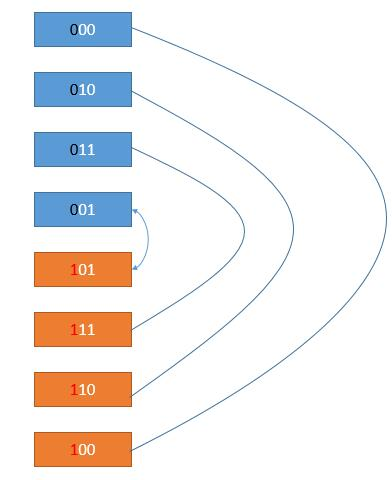

In [31]:
def grayCode(n):
    if n == 0:
        return [0]
    if n == 1:
        return [0]

    dp = [0,1,3,2]
    for i in range(n-2):
        tmp_len = len(dp)
        for j in range(tmp_len-1, -1, -1):
            dp.append(dp[j] + 2**(n-1))
            
    return dp

grayCode(3)

[0, 1, 3, 2, 6, 7, 5, 4]

In [ ]:
public List<Integer> grayCode(int n) {
    List<Integer> gray = new ArrayList<Integer>();
    gray.add(0); //初始化 n = 0 的解
    for (int i = 0; i < n; i++) {
        int add = 1 << i; //要加的数
        //倒序遍历，并且加上一个值添加到结果中
        for (int j = gray.size() - 1; j >= 0; j--) {
            gray.add(gray.get(j) + add);
        }
    }
    return gray;


## 48. 复制带随机指针的链表
https://leetcode-cn.com/problems/copy-list-with-random-pointer/solution/fu-zhi-dai-sui-ji-zhi-zhen-de-lian-biao-by-leetcod/

In [18]:
class Solution(object):
    """
    :type head: Node
    :rtype: Node
    """
    def __init__(self):
        # Dictionary which holds old nodes as keys and new nodes as its values.
        self.visitedHash = {}

    def copyRandomList(self, head):

        if head == None:
            return None

        # If we have already processed the current node, then we simply return the cloned version of it.
        if head in self.visitedHash:
            return self.visitedHash[head]

        # create a new node
        # with the value same as old node.
        node = Node(head.val, None, None)

        # Save this value in the hash map. This is needed since there might be
        # loops during traversal due to randomness of random pointers and this would help us avoid them.
        self.visitedHash[head] = node

        # Recursively copy the remaining linked list starting once from the next pointer and then from the random pointer.
        # Thus we have two independent recursive calls.
        # Finally we update the next and random pointers for the new node created.
        node.next = self.copyRandomList(head.next)
        node.random = self.copyRandomList(head.random)

        return node


## 49. 课程表
https://leetcode-cn.com/problems/course-schedule/solution/course-schedule-tuo-bu-pai-xu-bfsdfsliang-chong-fa/

In [28]:
你这个学期必须选修 numCourse 门课程，记为 0 到 numCourse-1 。

在选修某些课程之前需要一些先修课程。 例如，想要学习课程 0 ，你需要先完成课程 1 ，我们用一个匹配来表示他们：[0,1]

给定课程总量以及它们的先决条件，请你判断是否可能完成所有课程的学习？

 

示例 1:

输入: 2, [[1,0]] 
输出: true
解释: 总共有 2 门课程。学习课程 1 之前，你需要完成课程 0。所以这是可能的。
    
示例 2:

输入: 2, [[1,0],[0,1]]
输出: false
解释: 总共有 2 门课程。学习课程 1 之前，你需要先完成​课程 0；并且学习课程 0 之前，你还应先完成课程 1。这是不可能的。


SyntaxError: invalid syntax (<ipython-input-28-6b4edf5cc1ba>, line 1)

In [ ]:
from collections import deque

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        indegrees = [0 for _ in range(numCourses)]
        adjacency = [[] for _ in range(numCourses)]
        queue = deque()
        # Get the indegree and adjacency of every course.
        for cur, pre in prerequisites:
            indegrees[cur] += 1
            adjacency[pre].append(cur)
        # Get all the courses with the indegree of 0.
        for i in range(len(indegrees)):
            if not indegrees[i]: queue.append(i)
        # BFS TopSort.
        while queue:
            pre = queue.popleft()
            numCourses -= 1
            for cur in adjacency[pre]:
                indegrees[cur] -= 1
                if not indegrees[cur]: queue.append(cur)
        return not numCourses


In [30]:
def classSchedule(num, prerequisities):
    indegrees = [0] * num
    adjacency = [[] for i in range(num)]
    
    for cur, pre in prerequisities:
        indegrees[cur] += 1
        adjacency[pre].append(cur)
        
    queue = []
    for i in range(num):
        if indegrees[i] == 0:
            queue.append(i)
    
    while queue:
        pre = queue.pop(0)
        num -= 1
        for cur in adjacency[pre]:
            indegrees[cur] -= 1
            if indegrees[cur] == 0:
                queue.append(cur)
    
    return num == 0

num = 2
prerequisities = [[1,0], [0,1]]
classSchedule(num, prerequisities)

False

## 50. Stock Problem V

Say you have an array for which the ith element is the price of a given stock on day i.

Design an algorithm to find the maximum profit. You may complete at most k transactions.

In [27]:
def stock5(prices, k):
    dp = [[0 for j in range(len(prices))] for i in range(k+1)]
    
    
    for t in range(1, k+1):
        max_so_far = -0x7fffffff
        for d in range(1, len(prices)):
            max_so_far = max(max_so_far, dp[t-1][d-1]-prices[d-1])
            dp[t][d] = max(dp[t][d-1], prices[d]+max_so_far)
            
    return dp[-1][-1]

prices = [3,2,6,5,0,3]
k = 2
stock5(prices, k)

7

## 51. 0/1 Knapsack **

Given weights and values of n items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. 

# Solution:
we can build a table dp[n][w], w is avalable weight of bag, n is the number of item.

The first row is the first bag, if avalable weight is smaller than wt[0], then dp is 0 else dp is val[0]. The first col means not weight avalable, so first col is 0. 

For any dp[n][w]. If we take n th item, then dp = dp[n-1][w-wt[n]]. If we not take nth item, then dp = dp[n-1][w]. If avalable weight is smaller than wt[n], then we can only ignore current item

dp[n][w]表示，在背包还剩w空间的情况下，考虑前n个物品能获得的最大价值

当我们要取n这个物品的时候，我们得为它预留容量，这就是为啥dp = dp[n-1][w-wt[n]]，也就是说我还有w-wt[n]的容量去考虑n-1个物品

In [28]:
def knapSack(W, wt, val, n):
    dp = [[0 for j in range(W+1)] for i in range(n+1)]
    
    for i in range(1, n+1):
        for w in range(1, W+1):
            if w >= wt[i-1]:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-wt[i-1]]+val[i-1])
            else:
                dp[i][w] = dp[i-1][w]
    
    return dp[-1][-1]

val = [5, 3, 4]
wt = [3, 2, 1]
W = 5
n = len(val)
print(knapSack(W, wt, val, n))

9
